# Haberman Dataset

Downloaded this dataset from https://www.kaggle.com/gilsousa/habermans-survival-data-set

In [2]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
hdf = pd.read_csv('haberman.csv', names=['age','op_year','axil_nodes_det','surv_status'])
print(hdf.shape)
print(hdf.head(10))

(306, 4)
   age  op_year  axil_nodes_det  surv_status
0   30       64               1            1
1   30       62               3            1
2   30       65               0            1
3   31       59               2            1
4   31       65               4            1
5   33       58              10            1
6   33       60               0            1
7   34       59               0            2
8   34       66               9            2
9   34       58              30            1


CSV file contains total 306(0 to 305) entries and 4 columns.

In [205]:
print(hdf.columns)

Index(['age', 'op_year', 'axil_nodes_det', 'surv_status'], dtype='object')


In [206]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age               306 non-null int64
op_year           306 non-null int64
axil_nodes_det    306 non-null int64
surv_status       306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


1- All columns are int64 and non-null

In [207]:
hdf.describe()

,age,op_year,axil_nodes_det,surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Observations

1- Minimum and maximum age of patients are 30 and 83 respectively and mean is 52.45

2- Minimum positive axillary nodes is 0, 75% patients have less than 5 positive axillary nodes but max value of this column is 52    which means either top 25% patients have higher count of positive axillary nodes or the max value is an outlier.

3- 

In [208]:
#hdf.sort_values(['axil_nodes_det'], ascending=False)

In [209]:
hdf['surv_status'].value_counts()

1    225
2     81
Name: surv_status, dtype: int64

### Observations
Target column is 'Surv-status' and it is highly imbalanced. Ratio~3:1

In [210]:
#print('\nmax positive axillary nodes\n',hdf[hdf.axil_nodes_det==hdf.axil_nodes_det.max()])
#print(hdf[(hdf.age) & (hdf.surv_status==1)])
#rfs=hdf[hdf.surv_status==1]
#rfd=hdf[hdf.surv_status==2]
#print('\n',rfs[rfs.age==rfs.age.max()])
#print('\n',rfd[rfd.axil_nodes_det==rfd.axil_nodes_det.min()])
#print('\n',rfs[rfs.axil_nodes_det==rfs.axil_nodes_det.max()])

# Bivariate Analysis

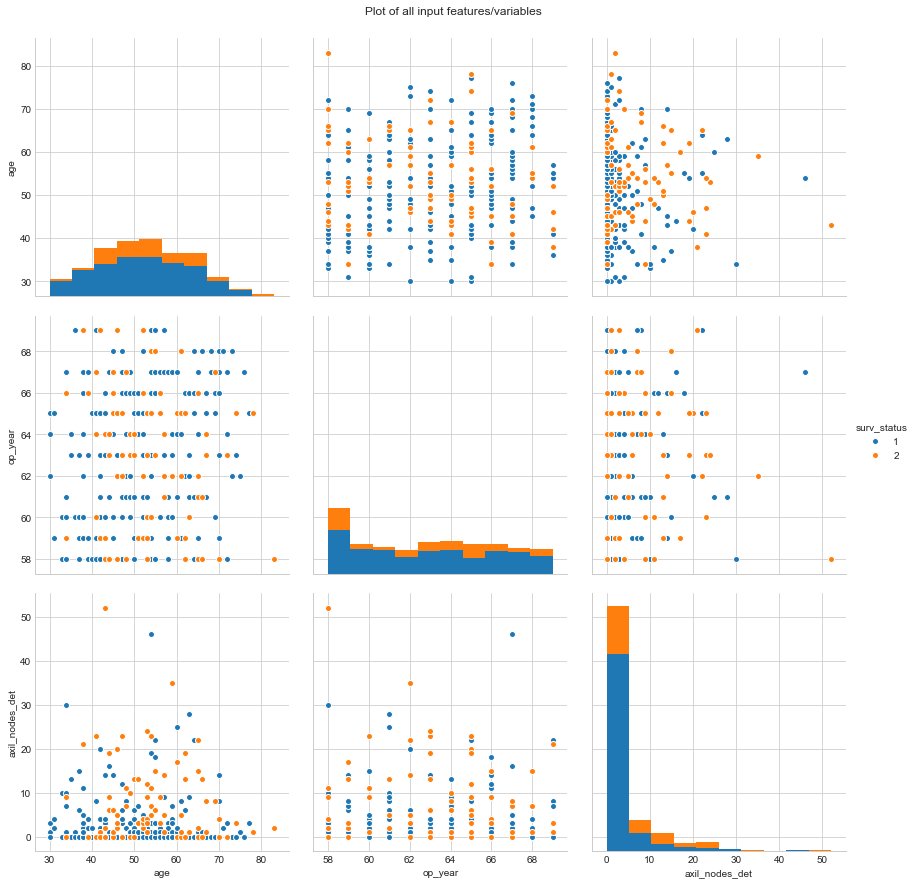

In [3]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hdf, vars=['age','op_year','axil_nodes_det'], hue='surv_status', size=4);
plt.suptitle('Plot of all input features/variables', y=1.02)
plt.show()

### Observations

1- Patients of agegroup 30 to 40 compared to other age groups, have higher chance of survival.

2- Majority of patients have positive axillary nodes count b/w 0 to 10.

3- Year 1965 witnessed most no. of unsuccessful operations.

4- Patients of agegroup 50 to 60 with positive axillary nodes 0 have higher chance of survival.

5- As positive axillary nodes grow in number that patient's chances of survival falls down.

6- I am not able to figure out any strong relationship b/w two variables. Datapoints are highly overlapped.

# Univariate Analysis

#### Histogram and PDF

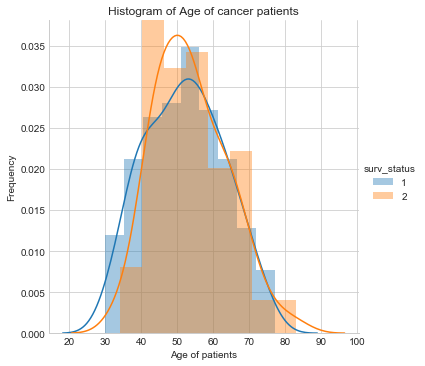

In [56]:
plt.close()
sns.set_style("whitegrid");
sns.FacetGrid(hdf, hue="surv_status", size=5) \
   .map(sns.distplot, 'age',) \
   .set(xlabel='Age of patients', ylabel='Frequency')\
   .add_legend()
plt.title('Histogram of Age of cancer patients')
plt.show();


### Observations

1- People of age 40 to 58 are more affected from cancer.

2- Patients of age 30 to 40 have better chance of survival.

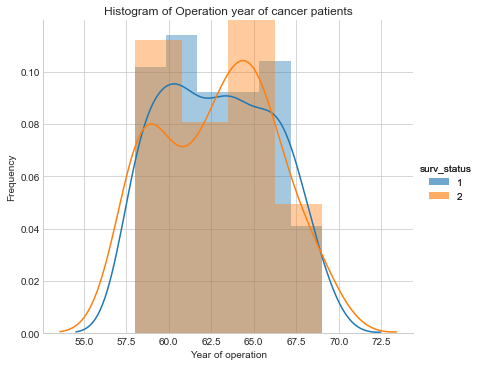

In [57]:
plt.close()
sns.FacetGrid(hdf, hue="surv_status", size=5) \
   .map(sns.distplot, 'op_year').add_legend() \
   .set(xlabel='Year of operation', ylabel='Frequency')\
   .add_legend();
plt.title('Histogram of Operation year of cancer patients')
plt.show();


### Observations

In year 63 to 66 hospital witnessed mostly unsuccessful operations.

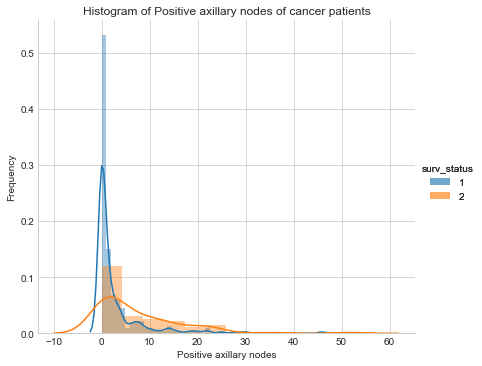

In [58]:
plt.close()
sns.FacetGrid(hdf, hue="surv_status", size=5) \
   .map(sns.distplot, 'axil_nodes_det').add_legend() \
   .set(xlabel='Positive axillary nodes', ylabel='Frequency')\
   .add_legend();
plt.title('Histogram of Positive axillary nodes of cancer patients')
plt.show();


### Observations

1- Most patients have positive axillary nodes between 0 to 5

2- Patients with axillary nodes 0 and 1 have higher chance of survival.

## Box Plot and Violin Plot

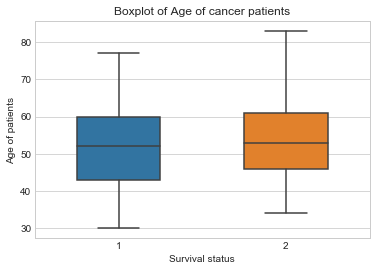

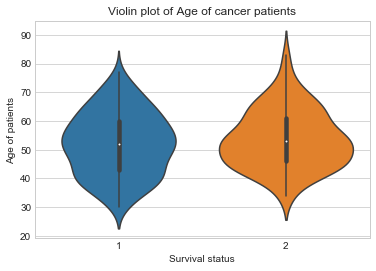

In [59]:
plt.close();
sns.boxplot(x='surv_status', y='age', data=hdf, width=0.5)\
   .set(xlabel='Survival status', ylabel='Age of patients')
plt.title('Boxplot of Age of cancer patients')
plt.show()

sns.violinplot(x="surv_status", y="age", data=hdf, size=8)\
   .set(xlabel='Survival status', ylabel='Age of patients');
plt.title('Violin plot of Age of cancer patients')
plt.show()

### Observations

As patients grow older they have less chance of survival.

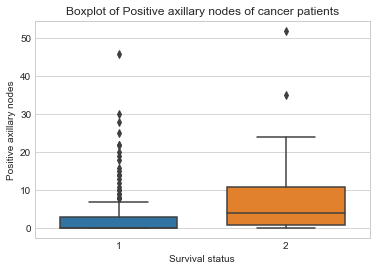

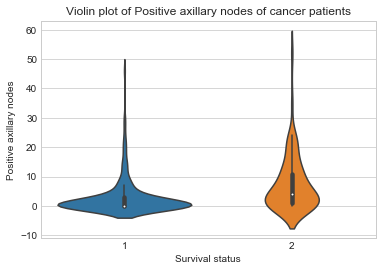

In [54]:
plt.close();
sns.boxplot(x='surv_status',y='axil_nodes_det', data=hdf, width=0.7)\
   .set(xlabel='Survival status', ylabel='Positive axillary nodes');
#print(type(bx2))
#bx2.set_title('Histogram of Age of cancer patients')
plt.title('Boxplot of Positive axillary nodes of cancer patients')
plt.show()

sns.violinplot(x="surv_status", y="axil_nodes_det", data=hdf, size=8)\
   .set(xlabel='Survival status', ylabel='Positive axillary nodes');
plt.title('Violin plot of Positive axillary nodes of cancer patients')
plt.show()

### Observations

1- Patients with 0 positive axillary nodes have higher chance of survival.

2- Patients with more than 50 positive axillary nodes have less chance of survival.

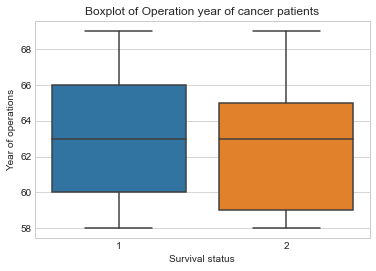

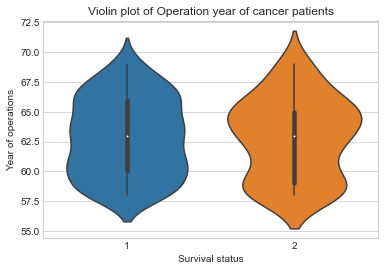

In [55]:
plt.close();
sns.boxplot(x='surv_status',y='op_year', data=hdf)\
   .set(xlabel='Survival status', ylabel='Year of operations');
plt.title('Boxplot of Operation year of cancer patients')
plt.show()

sns.violinplot(x="surv_status", y="op_year", data=hdf, size=8)\
   .set(xlabel='Survival status', ylabel='Year of operations');
plt.title('Violin plot of Operation year of cancer patients')
plt.show()

In [220]:
#hdfz= hdf[hdf.axil_nodes_det==0]
#type(hdfz)
#hdfz[hdfz.surv_status==2]

[0.73529412 0.         0.         0.         0.         0.
 0.         0.         0.         0.26470588]
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]


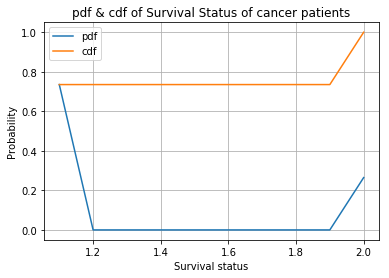

In [32]:
plt.close();
counts, bin_edges = np.histogram(hdf['surv_status'], bins=10)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf');
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.xlabel('Survival status')
plt.ylabel('Probability')
plt.title('pdf & cdf of Survival Status of cancer patients')
plt.grid()
plt.legend()
plt.show()

### Observations

Above CDF shows around 73% patients have survival status 1 and 27% people have survival status 2

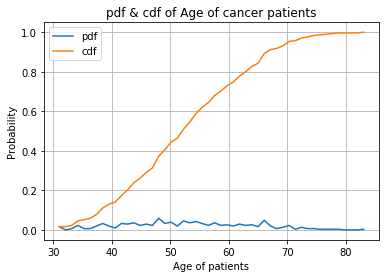

In [31]:
plt.close();
counts, bin_edges = np.histogram(hdf['age'], bins=50)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf');
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.title('pdf & cdf of Age of cancer patients')
plt.legend()
plt.grid()
plt.xlabel('Age of patients')
plt.ylabel('Probability')
plt.show()

### Observations
Breast cancer is widely spread in society, almost all age group of adults are affected from this. Minimum number of patients are from agegroup 30 to 40(13% of all patients) and mostly patients belong to age group 50 to 70.

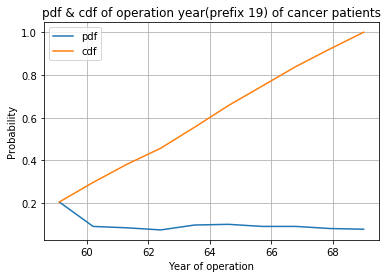

In [30]:
plt.close();
counts, bin_edges = np.histogram(hdf['op_year'], bins=10)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf');
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.xlabel('Year of operation')
plt.ylabel('Probability')
plt.title('pdf & cdf of operation year(prefix 19) of cancer patients')
plt.legend()
plt.grid()
plt.show()

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


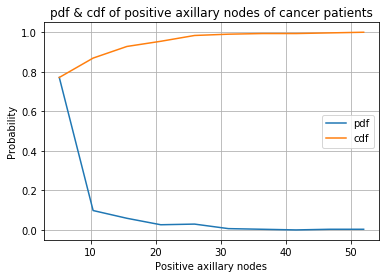

In [27]:
plt.close();
counts, bin_edges = np.histogram(hdf['axil_nodes_det'], bins=10)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf')
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.xlabel('Positive axillary nodes')
plt.ylabel('Probability')
plt.title('pdf & cdf of positive axillary nodes of cancer patients')
plt.grid()
plt.legend()
plt.show()

### Observations
Nearly 83% patients have positive axillary nodes less than 10

In [223]:
#hdf.op_year.unique()

## Conclusions
Data is imbalanced and highly overlapping. I failed to establish any strong relationship b/w input variables. Only handful of inferences can be drawn from given data, based on which We can't build a simple if-else model as we've discussed in previous iris data set.